In [1]:
from dolfin import *
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss
import numpy as np
from ufl import tanh
import solver3D as s3
import matrix2D as m2

Missing HsMG for fract norm computing


/home/saragazzoni/miniconda3/envs/myfenics/lib/python3.11/site-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()


In [2]:
mesh = IntervalMesh(20, 0, 1)

time=0: 
Solving linear variational problem.
iter=1: norm=7.90829e-06


HDF5-DIAG: Error detected in HDF5 (1.12.2) MPI-process 0:
  #000: H5F.c line 620 in H5Fopen(): unable to open file
    major: File accessibility
    minor: Unable to open file
  #001: H5VLcallback.c line 3501 in H5VL_file_open(): failed to iterate over available VOL connector plugins
    major: Virtual Object Layer
    minor: Iteration failed
  #002: H5PLpath.c line 578 in H5PL__path_table_iterate(): can't iterate over plugins in plugin path '(null)'
    major: Plugin for dynamically loaded library
    minor: Iteration failed
  #003: H5PLpath.c line 620 in H5PL__path_table_iterate_process_path(): can't open directory: /home/saragazzoni/miniconda3/envs/myfenics/lib/hdf5/plugin
    major: Plugin for dynamically loaded library
    minor: Can't open directory or file
  #004: H5VLcallback.c line 3351 in H5VL__file_open(): open failed
    major: Virtual Object Layer
    minor: Can't open object
  #005: H5VLnative_file.c line 97 in H5VL__native_file_open(): unable to open file
    major: File

(4141, 4141)


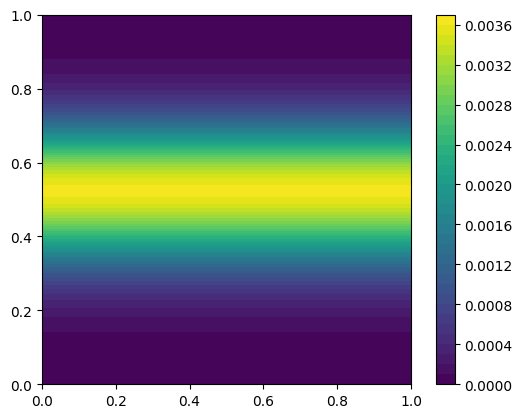

HDF5-DIAG: Error detected in HDF5 (1.12.2) MPI-process 0:
  #000: H5F.c line 620 in H5Fopen(): unable to open file
    major: File accessibility
    minor: Unable to open file
  #001: H5VLcallback.c line 3501 in H5VL_file_open(): failed to iterate over available VOL connector plugins
    major: Virtual Object Layer
    minor: Iteration failed
  #002: H5PLpath.c line 578 in H5PL__path_table_iterate(): can't iterate over plugins in plugin path '(null)'
    major: Plugin for dynamically loaded library
    minor: Iteration failed
  #003: H5PLpath.c line 620 in H5PL__path_table_iterate_process_path(): can't open directory: /home/saragazzoni/miniconda3/envs/myfenics/lib/hdf5/plugin
    major: Plugin for dynamically loaded library
    minor: Can't open directory or file
  #004: H5VLcallback.c line 3351 in H5VL__file_open(): open failed
    major: Virtual Object Layer
    minor: Can't open object
  #005: H5VLnative_file.c line 97 in H5VL__native_file_open(): unable to open file
    major: File

time=0.5: 
iter=1: norm=0.0017375
iter=2: norm=3.35688e-06
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=1: 
iter=1: norm=0.000371467
Solving linear variational problem.
(4141, 4141)


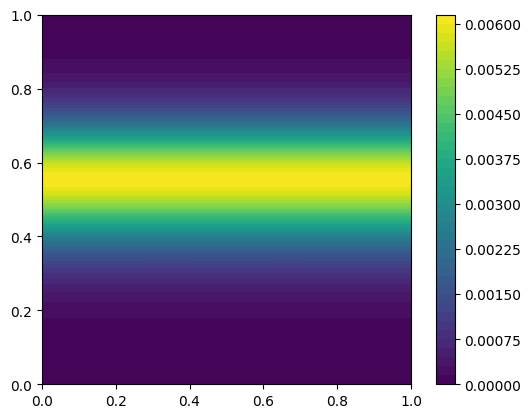

time=1.5: 
iter=1: norm=0.000465135
Solving linear variational problem.
(4141, 4141)
time=2: 
iter=1: norm=0.000580137
Solving linear variational problem.
(4141, 4141)


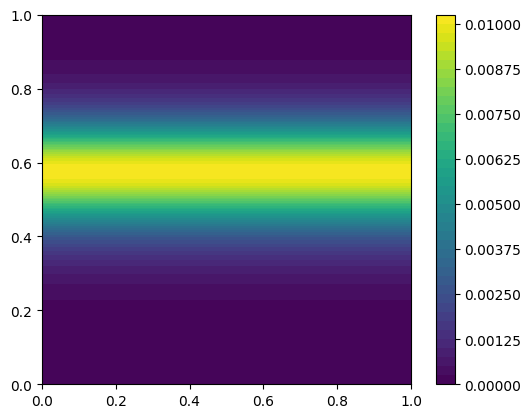

time=2.5: 
iter=1: norm=0.000721419
Solving linear variational problem.
(4141, 4141)
time=3: 
iter=1: norm=0.000893967
Solving linear variational problem.
(4141, 4141)


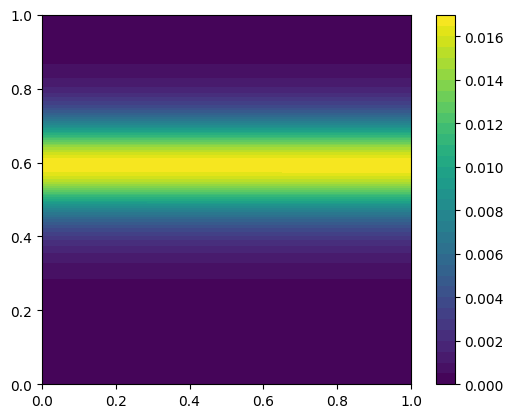

time=3.5: 
iter=1: norm=0.00110338
iter=2: norm=7.16908e-06
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=4: 
iter=1: norm=0.00134873
iter=2: norm=1.07792e-05
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


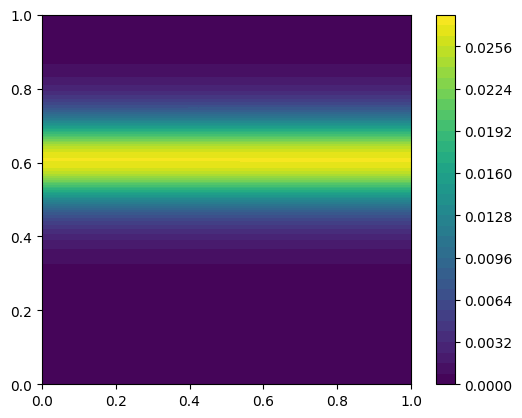

time=4.5: 
iter=1: norm=0.00164733
Solving linear variational problem.
iter=2: norm=1.6175e-05
Solving linear variational problem.
(4141, 4141)
time=5: 
iter=1: norm=0.00200112
iter=2: norm=2.40927e-05
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


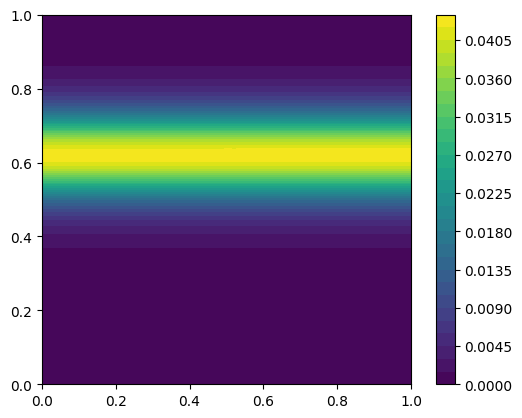

time=5.5: 
iter=1: norm=0.0024168
iter=2: norm=3.5585e-05
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=6: 
iter=1: norm=0.00290094
iter=2: norm=5.20703e-05
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


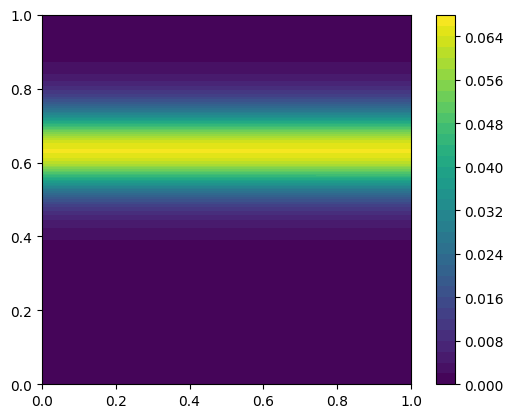

time=6.5: 
iter=1: norm=0.00345964
iter=2: norm=7.54226e-05
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=7: 
iter=1: norm=0.00409815
iter=2: norm=0.000108065
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


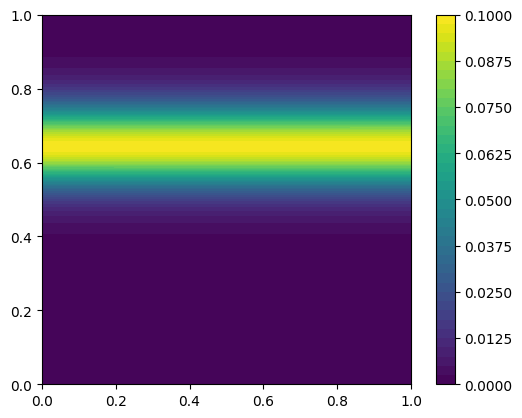

time=7.5: 
iter=1: norm=0.00482052
iter=2: norm=0.000153057
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=8: 
iter=1: norm=0.00562905
iter=2: norm=0.000214168
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


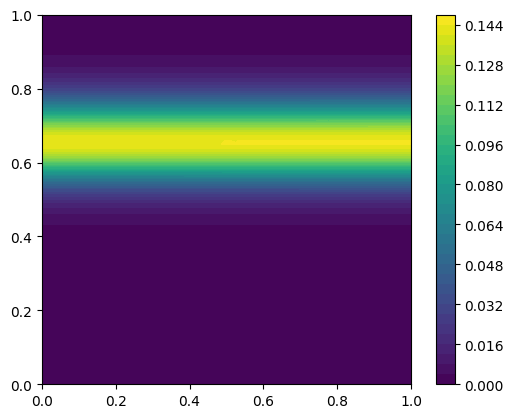

time=8.5: 
iter=1: norm=0.00652391
iter=2: norm=0.000295911
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=9: 
iter=1: norm=0.00750266
iter=2: norm=0.000403519
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


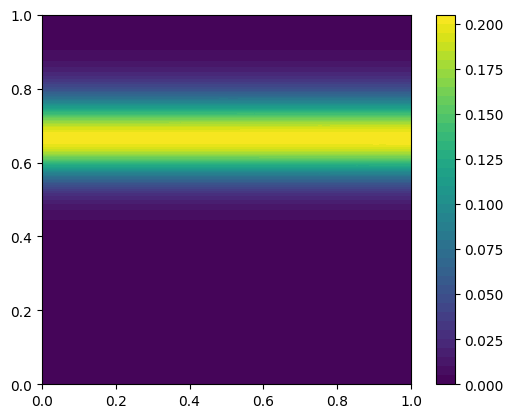

time=9.5: 
iter=1: norm=0.00855987
iter=2: norm=0.000542851
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=10: 
iter=1: norm=0.00968685
iter=2: norm=0.000720188
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


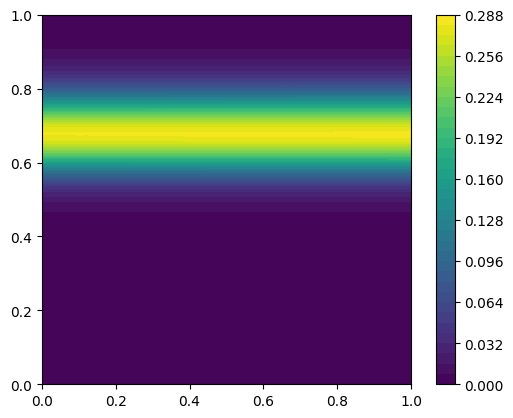

time=10.5: 
iter=1: norm=0.0108715
Solving linear variational problem.
iter=2: norm=0.000941929
Solving linear variational problem.
(4141, 4141)
time=11: 
iter=1: norm=0.0120985
iter=2: norm=0.00121416
iter=3: norm=0.000122557
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


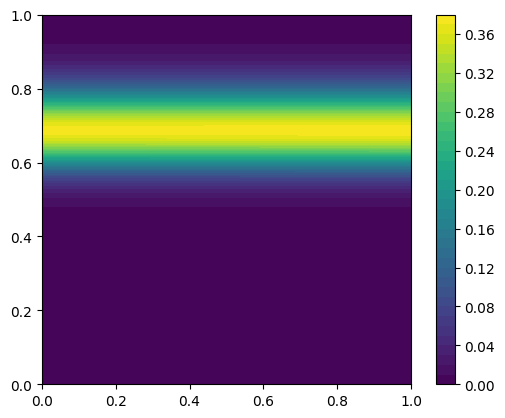

time=11.5: 
iter=1: norm=0.0132418
iter=2: norm=0.0015298
iter=3: norm=0.000177916
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=12: 
iter=1: norm=0.0144482
Solving linear variational problem.
iter=2: norm=0.00190941
Solving linear variational problem.
iter=3: norm=0.000254273
Solving linear variational problem.
(4141, 4141)


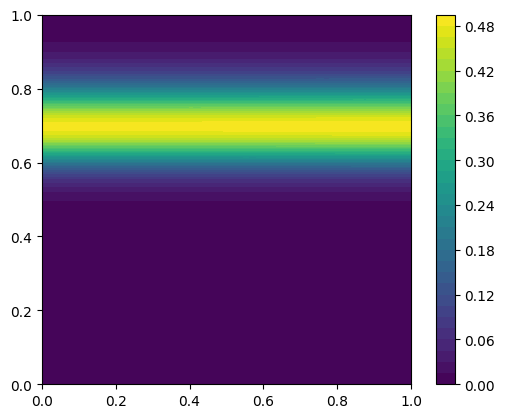

time=12.5: 
iter=1: norm=0.0156186
iter=2: norm=0.00234622
iter=3: norm=0.000355524
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=13: 
iter=1: norm=0.0167257
iter=2: norm=0.00283778
iter=3: norm=0.000486225
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


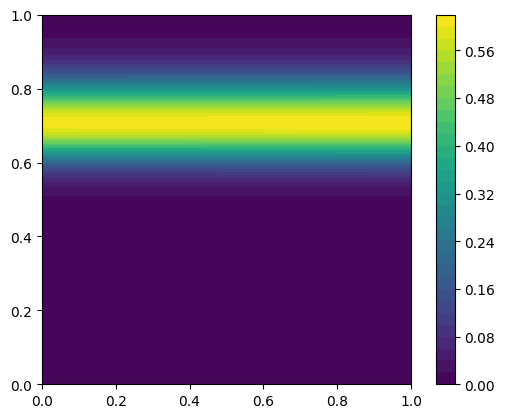

time=13.5: 
iter=1: norm=0.0177425
iter=2: norm=0.00337829
iter=3: norm=0.000650369
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=14: 
iter=1: norm=0.018643
iter=2: norm=0.00395836
iter=3: norm=0.000850805
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


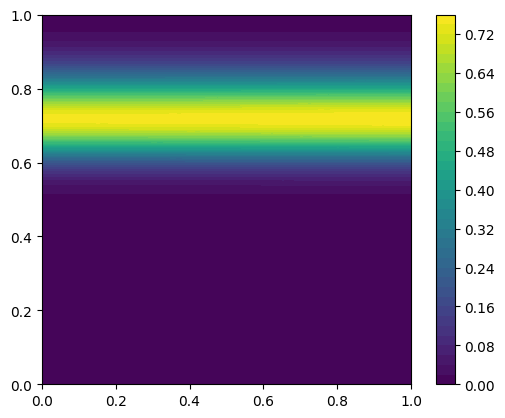

time=14.5: 
iter=1: norm=0.0194037
iter=2: norm=0.0045651
iter=3: norm=0.00108862
iter=4: norm=0.000260373
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=15: 
iter=1: norm=0.0198137
iter=2: norm=0.00513355
iter=3: norm=0.00134975
iter=4: norm=0.000356138
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


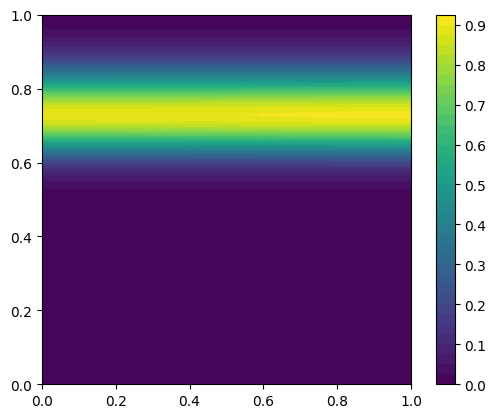

time=15.5: 
iter=1: norm=0.0201745
iter=2: norm=0.00572045
iter=3: norm=0.00164807
iter=4: norm=0.000476777
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=16: 
iter=1: norm=0.0203378
iter=2: norm=0.00627299
iter=3: norm=0.00196829
iter=4: norm=0.000620537
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


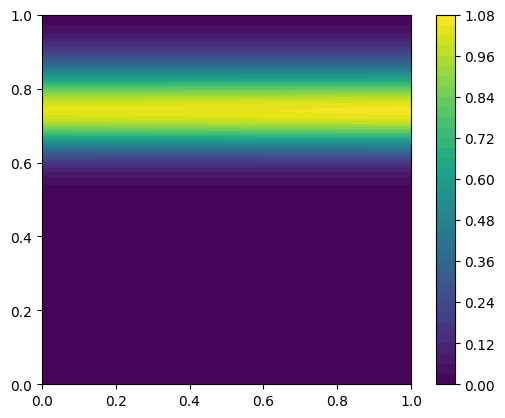

time=16.5: 
iter=1: norm=0.0202986
iter=2: norm=0.00677025
iter=3: norm=0.00229984
iter=4: norm=0.00078546
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=17: 
iter=1: norm=0.0200585
iter=2: norm=0.00719267
iter=3: norm=0.00262983
iter=4: norm=0.00096731
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


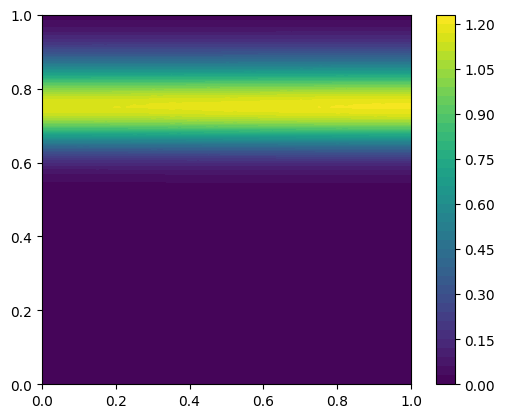

time=17.5: 
iter=1: norm=0.0196249
iter=2: norm=0.0075232
iter=3: norm=0.00294388
iter=4: norm=0.00115955
iter=5: norm=0.000457855
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=18: 
iter=1: norm=0.0187395
iter=2: norm=0.00763897
iter=3: norm=0.00318196
iter=4: norm=0.00133476
iter=5: norm=0.000561452
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


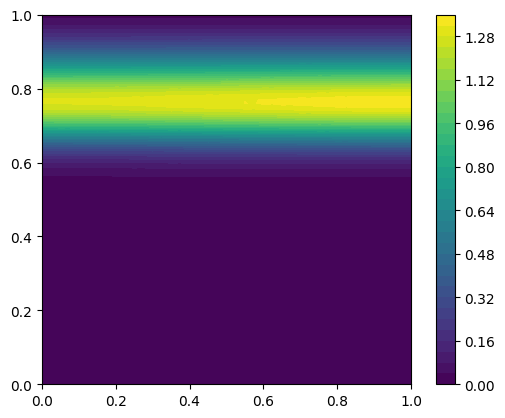

time=18.5: 
iter=1: norm=0.0179057
iter=2: norm=0.00771919
iter=3: norm=0.00340425
iter=4: norm=0.00151255
iter=5: norm=0.000674115
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=19: 
iter=1: norm=0.016934
iter=2: norm=0.00768046
iter=3: norm=0.00356781
iter=4: norm=0.00167036
iter=5: norm=0.000784645
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


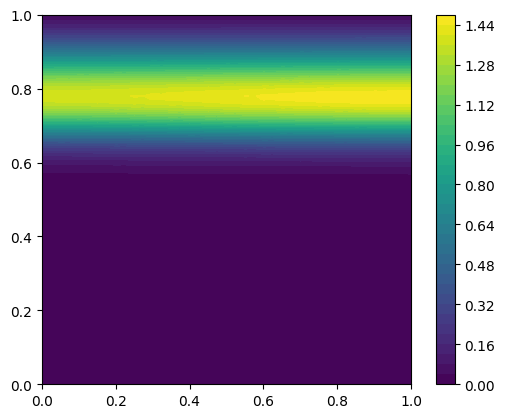

time=19.5: 
iter=1: norm=0.0158522
iter=2: norm=0.00752617
iter=3: norm=0.00366454
iter=4: norm=0.00179878
iter=5: norm=0.000886114
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=20: 
iter=1: norm=0.0146934
iter=2: norm=0.00726695
iter=3: norm=0.00369142
iter=4: norm=0.00189076
iter=5: norm=0.000972087
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


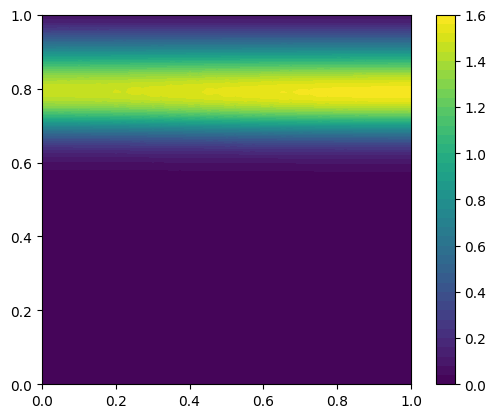

time=20.5: 
iter=1: norm=0.0134938
iter=2: norm=0.00691967
iter=3: norm=0.00365091
iter=4: norm=0.00194258
iter=5: norm=0.0010376
iter=6: norm=0.000555298
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=21: 
iter=1: norm=0.0120306
iter=2: norm=0.00636675
iter=3: norm=0.00347532
iter=4: norm=0.00191315
iter=5: norm=0.00105722
iter=6: norm=0.000585388
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


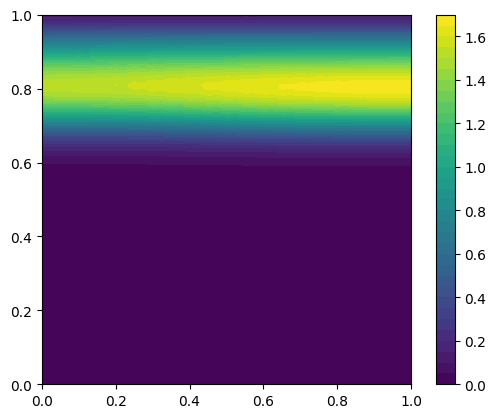

time=21.5: 
iter=1: norm=0.0108451
iter=2: norm=0.00589932
iter=3: norm=0.00331819
iter=4: norm=0.00188241
iter=5: norm=0.00107197
iter=6: norm=0.000611684
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=22: 
iter=1: norm=0.00973582
iter=2: norm=0.00542362
iter=3: norm=0.00313266
iter=4: norm=0.00182509
iter=5: norm=0.00106733
iter=6: norm=0.00062543
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


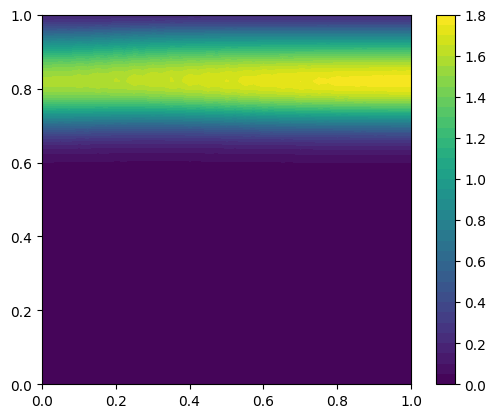

time=22.5: 
iter=1: norm=0.00871777
iter=2: norm=0.00495795
iter=3: norm=0.00293173
iter=4: norm=0.00174876
iter=5: norm=0.001047
iter=6: norm=0.000628094
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=23: 
iter=1: norm=0.0077977
iter=2: norm=0.00451553
iter=3: norm=0.00272625
iter=4: norm=0.00166054
iter=5: norm=0.0010151
iter=6: norm=0.000621739
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


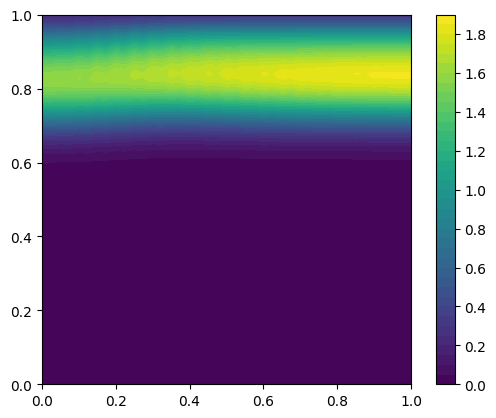

time=23.5: 
iter=1: norm=0.00697239
iter=2: norm=0.00410247
iter=3: norm=0.00252307
iter=4: norm=0.00156559
iter=5: norm=0.000974917
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=24: 
iter=1: norm=0.00646577
iter=2: norm=0.00386669
iter=3: norm=0.00241729
iter=4: norm=0.00152468
iter=5: norm=0.000965073
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


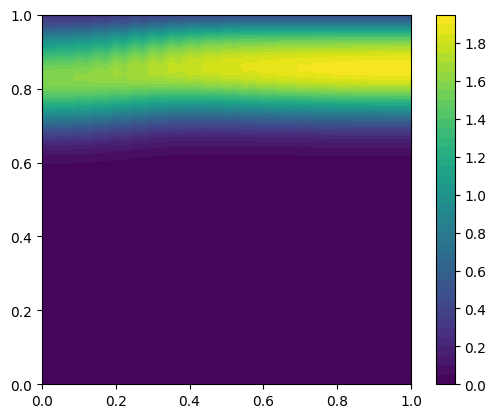

time=24.5: 
iter=1: norm=0.00581243
iter=2: norm=0.00352272
iter=3: norm=0.00223501
iter=4: norm=0.0014307
iter=5: norm=0.000918984
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=25: 
iter=1: norm=0.00520627
iter=2: norm=0.00319365
iter=3: norm=0.00205323
iter=4: norm=0.00133186
iter=5: norm=0.000866807
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


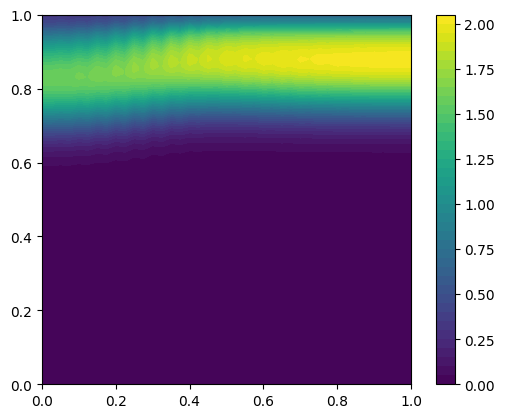

time=25.5: 
iter=1: norm=0.00465793
iter=2: norm=0.00288935
iter=3: norm=0.00187982
iter=4: norm=0.00123392
iter=5: norm=0.000812566
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=26: 
iter=1: norm=0.0041626
iter=2: norm=0.00260931
iter=3: norm=0.00171592
iter=4: norm=0.00113839
iter=5: norm=0.000757594
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


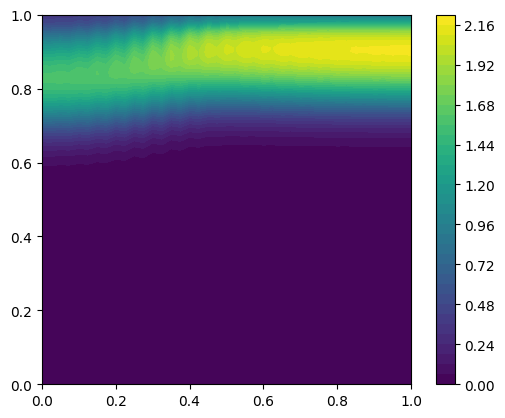

time=26.5: 
iter=1: norm=0.00371468
iter=2: norm=0.00235201
iter=3: norm=0.00156177
iter=4: norm=0.00104608
iter=5: norm=0.000702765
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=27: 
iter=1: norm=0.00330908
iter=2: norm=0.00211576
iter=3: norm=0.00141731
iter=4: norm=0.000957513
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


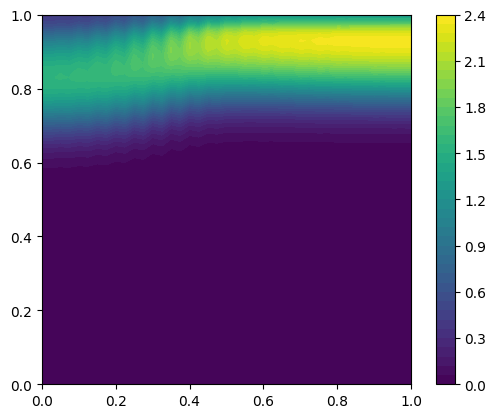

time=27.5: 
iter=1: norm=0.00315459
iter=2: norm=0.00204517
iter=3: norm=0.00138124
iter=4: norm=0.000940197
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=28: 
iter=1: norm=0.00284636
iter=2: norm=0.00186485
iter=3: norm=0.00126883
iter=4: norm=0.000869723
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


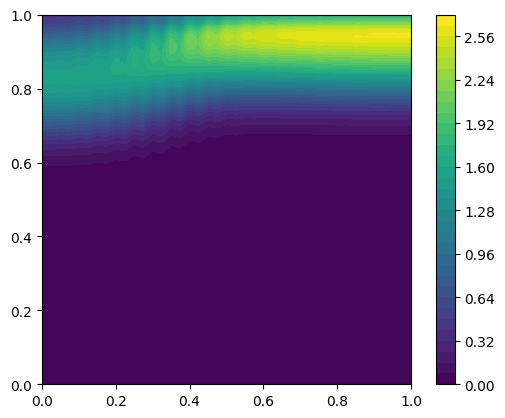

time=28.5: 
iter=1: norm=0.00253008
iter=2: norm=0.00167427
iter=3: norm=0.00114696
iter=4: norm=0.000791174
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=29: 
iter=1: norm=0.00223357
iter=2: norm=0.00149311
iter=3: norm=0.00102933
iter=4: norm=0.000714112
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


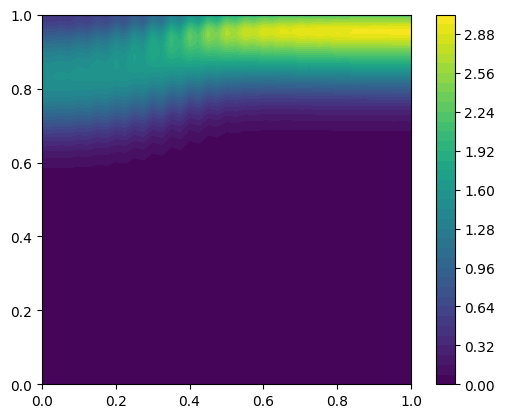

time=29.5: 
iter=1: norm=0.00196066
iter=2: norm=0.00132457
iter=3: norm=0.000918545
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=30: 
iter=1: norm=0.00190988
iter=2: norm=0.00130762
iter=3: norm=0.000911827
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


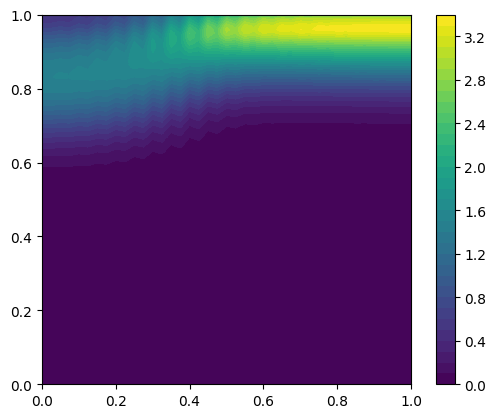

time=30.5: 
iter=1: norm=0.00172688
iter=2: norm=0.00119574
iter=3: norm=0.000838173
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=31: 
iter=1: norm=0.00151188
iter=2: norm=0.00105847
iter=3: norm=0.000745697
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


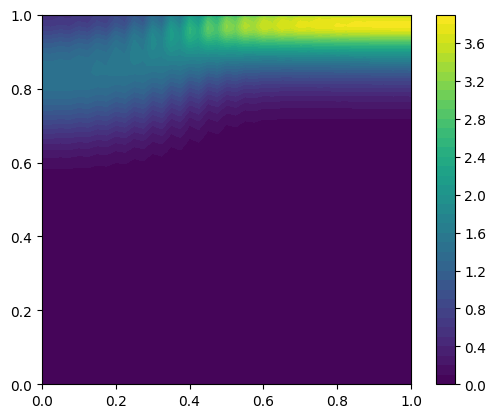

time=31.5: 
iter=1: norm=0.00129818
iter=2: norm=0.000918905
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=32: 
iter=1: norm=0.00129299
iter=2: norm=0.000923131
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


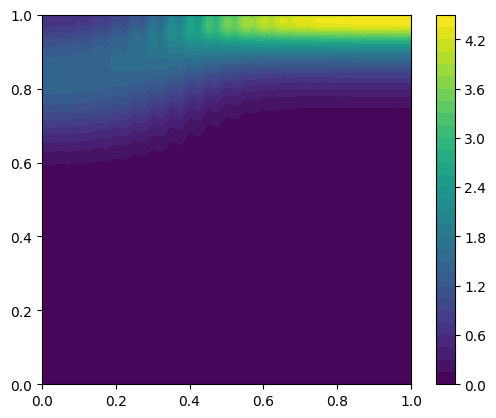

time=32.5: 
iter=1: norm=0.0011783
iter=2: norm=0.000847334
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=33: 
iter=1: norm=0.00101855
iter=2: norm=0.000735442
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


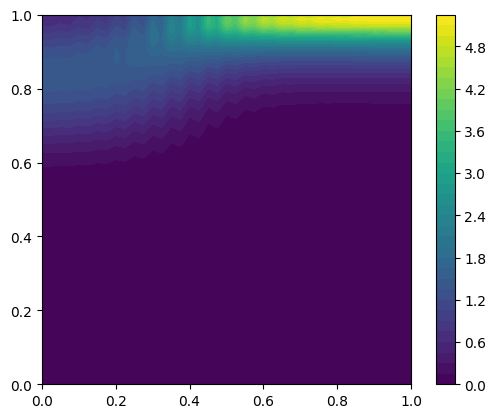

time=33.5: 
iter=1: norm=0.000847848
Solving linear variational problem.
(4141, 4141)
time=34: 
iter=1: norm=0.000859416
Solving linear variational problem.
(4141, 4141)


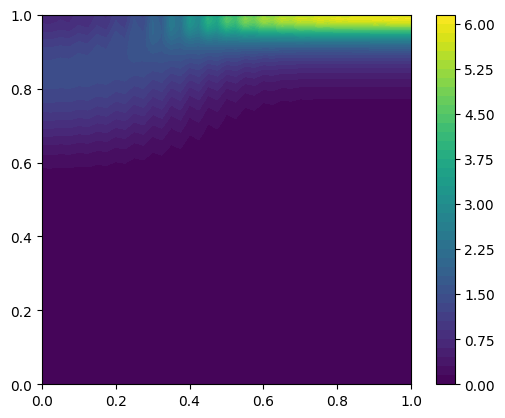

time=34.5: 
iter=1: norm=0.000799844
Solving linear variational problem.
(4141, 4141)
time=35: 
iter=1: norm=0.000706986
Solving linear variational problem.
(4141, 4141)


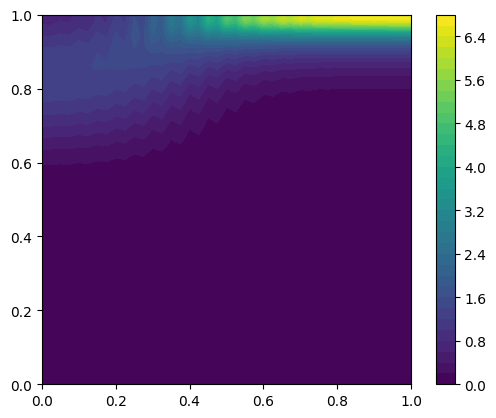

time=35.5: 
iter=1: norm=0.000619093
Solving linear variational problem.
(4141, 4141)
time=36: 
iter=1: norm=0.000578246
Solving linear variational problem.
(4141, 4141)


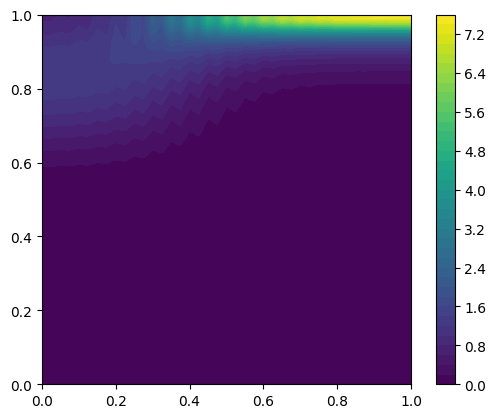

time=36.5: 
iter=1: norm=0.00061529
Solving linear variational problem.
(4141, 4141)
time=37: 
iter=1: norm=0.000725563
Solving linear variational problem.
(4141, 4141)


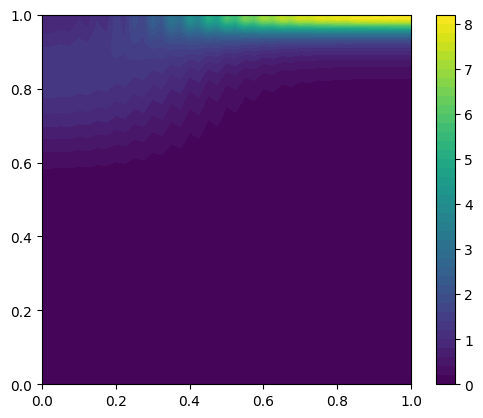

time=37.5: 
iter=1: norm=0.000881884
Solving linear variational problem.
(4141, 4141)
time=38: 
iter=1: norm=0.00106028
iter=2: norm=0.000454153
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


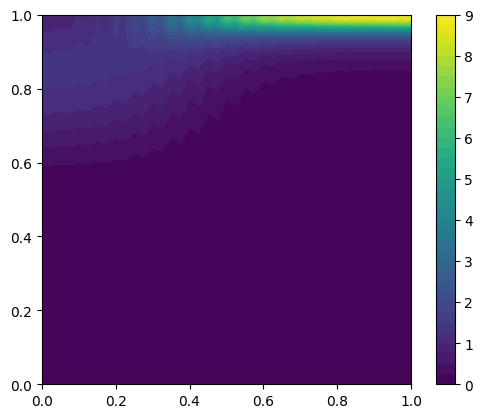

time=38.5: 
iter=1: norm=0.00107693
iter=2: norm=0.000507447
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=39: 
iter=1: norm=0.00117018
iter=2: norm=0.000569941
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


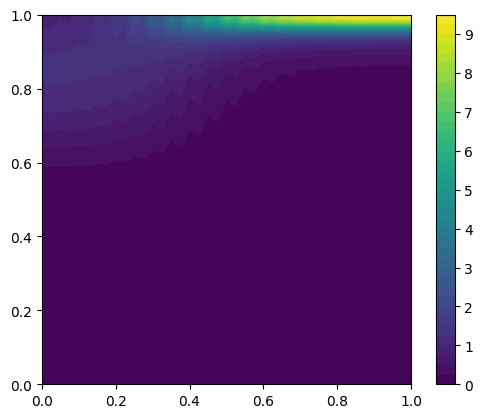

time=39.5: 
iter=1: norm=0.00126269
iter=2: norm=0.000630663
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=40: 
iter=1: norm=0.00134968
iter=2: norm=0.000687137
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


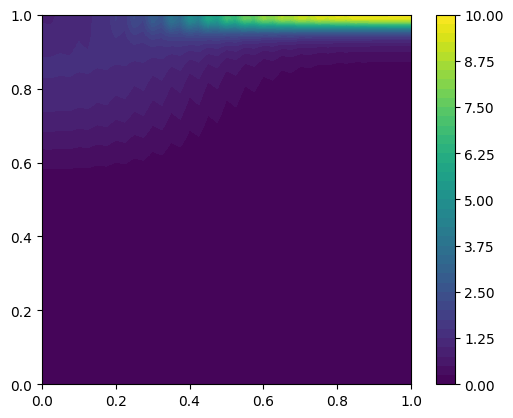

time=40.5: 
iter=1: norm=0.0014293
iter=2: norm=0.000738064
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=41: 
iter=1: norm=0.00150045
iter=2: norm=0.000782697
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


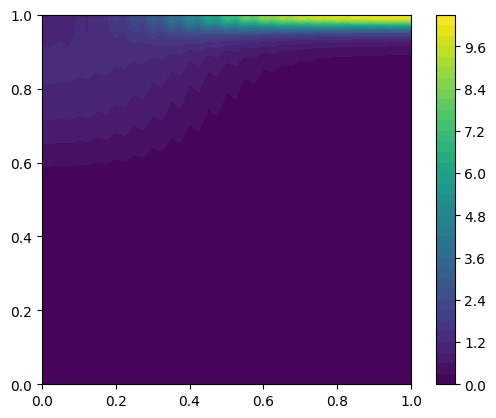

time=41.5: 
iter=1: norm=0.00156236
iter=2: norm=0.000820594
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=42: 
iter=1: norm=0.00161457
iter=2: norm=0.000851503
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


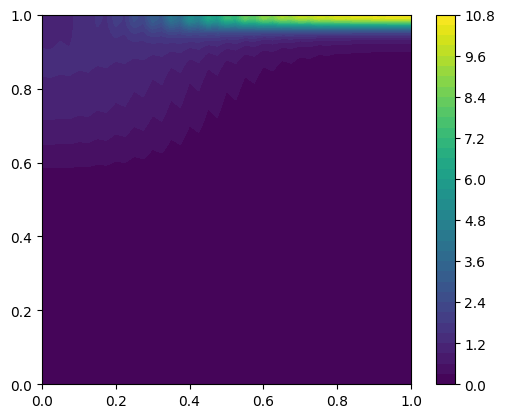

time=42.5: 
iter=1: norm=0.00165674
iter=2: norm=0.000875288
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=43: 
iter=1: norm=0.0016887
iter=2: norm=0.0008919
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


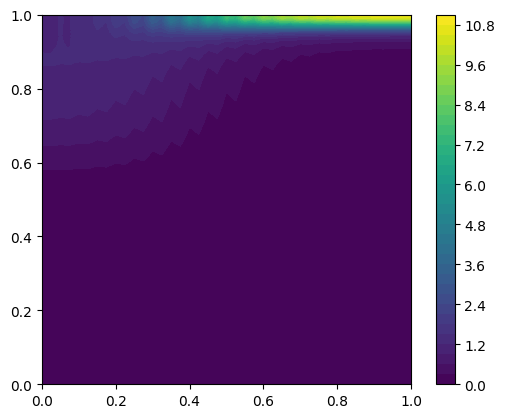

time=43.5: 
iter=1: norm=0.00171038
iter=2: norm=0.00090136
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=44: 
iter=1: norm=0.00172178
iter=2: norm=0.000903746
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


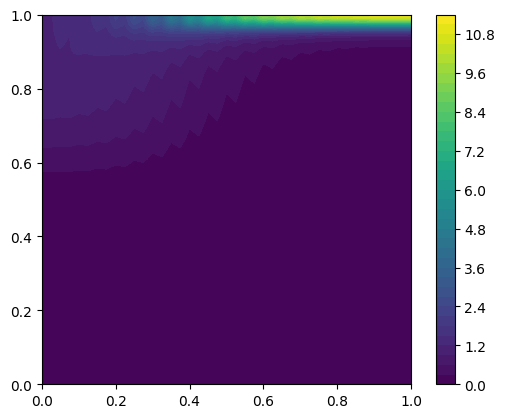

time=44.5: 
iter=1: norm=0.00172303
iter=2: norm=0.000899194
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=45: 
iter=1: norm=0.00171431
iter=2: norm=0.000887888
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


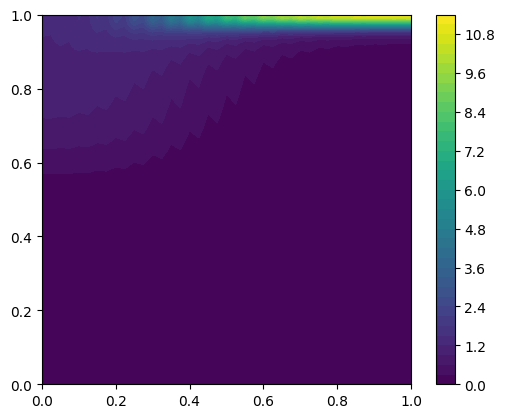

time=45.5: 
iter=1: norm=0.00169591
iter=2: norm=0.000870061
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=46: 
iter=1: norm=0.00166819
iter=2: norm=0.000845988
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


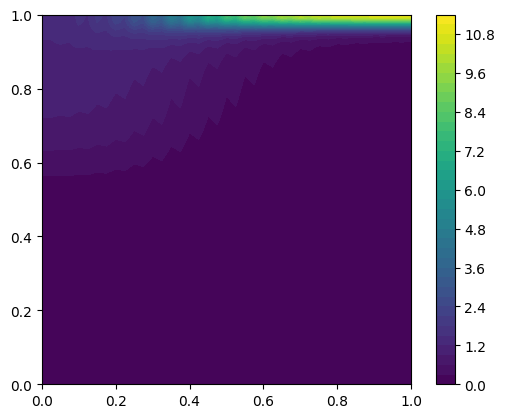

time=46.5: 
iter=1: norm=0.00163158
iter=2: norm=0.000815985
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=47: 
iter=1: norm=0.0015866
iter=2: norm=0.000780402
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


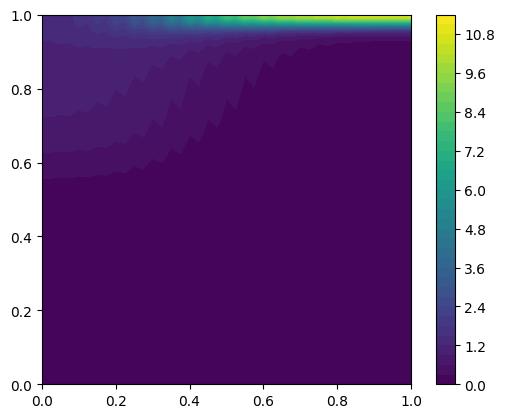

time=47.5: 
iter=1: norm=0.00153383
iter=2: norm=0.000739617
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=48: 
iter=1: norm=0.00147392
iter=2: norm=0.000694035
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


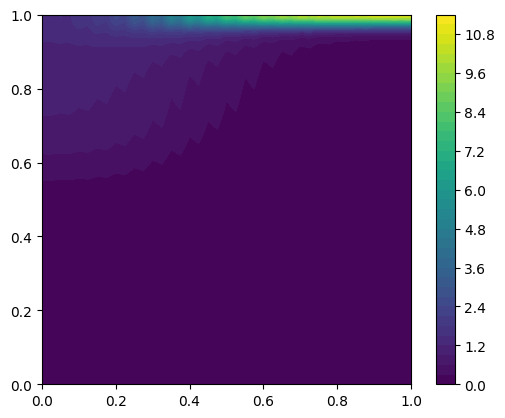

time=48.5: 
iter=1: norm=0.00140759
iter=2: norm=0.00064408
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=49: 
iter=1: norm=0.00133563
iter=2: norm=0.000590195
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


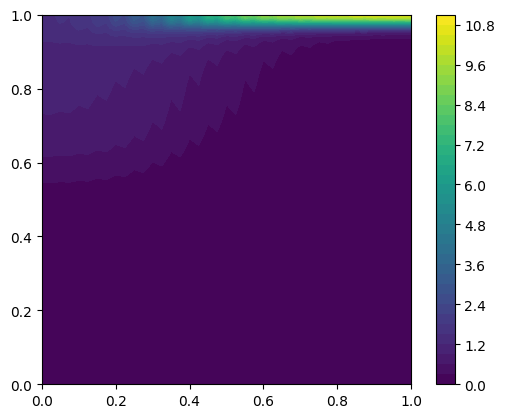

time=49.5: 
iter=1: norm=0.00125892
iter=2: norm=0.000532837
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=50: 
iter=1: norm=0.00117841
iter=2: norm=0.000472482
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


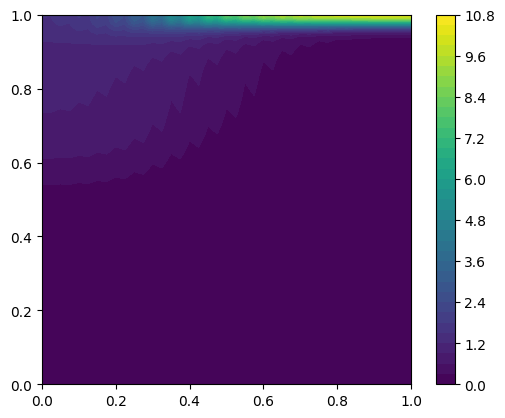

time=50.5: 
iter=1: norm=0.0010952
iter=2: norm=0.000409632
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=51: 
iter=1: norm=0.00101053
iter=2: norm=0.000344847
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


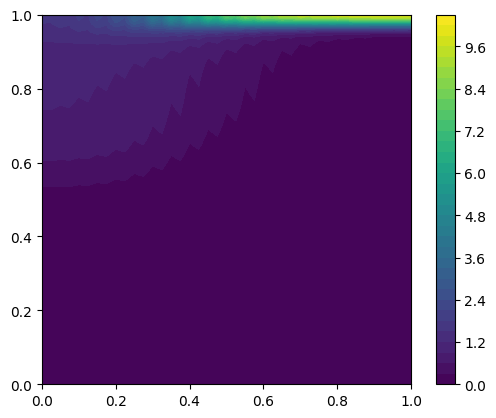

time=51.5: 
iter=1: norm=0.000925876
Solving linear variational problem.
(4141, 4141)
time=52: 
iter=1: norm=0.000958393
Solving linear variational problem.
(4141, 4141)


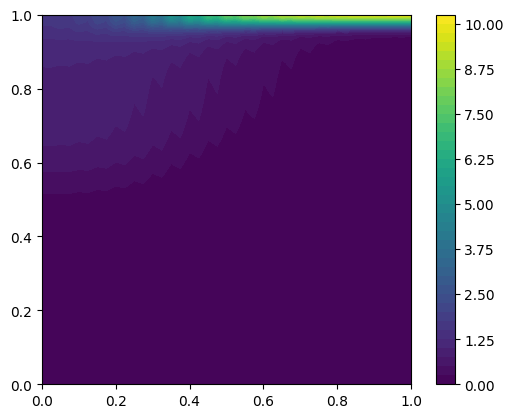

time=52.5: 
iter=1: norm=0.00089928
Solving linear variational problem.
(4141, 4141)
time=53: 
iter=1: norm=0.000817133
Solving linear variational problem.
(4141, 4141)


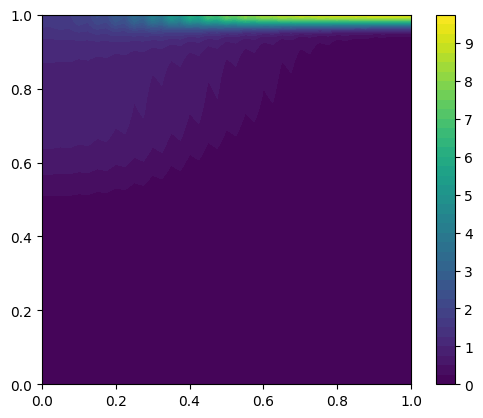

time=53.5: 
iter=1: norm=0.00073198
Solving linear variational problem.
(4141, 4141)
time=54: 
iter=1: norm=0.000659708
Solving linear variational problem.
(4141, 4141)


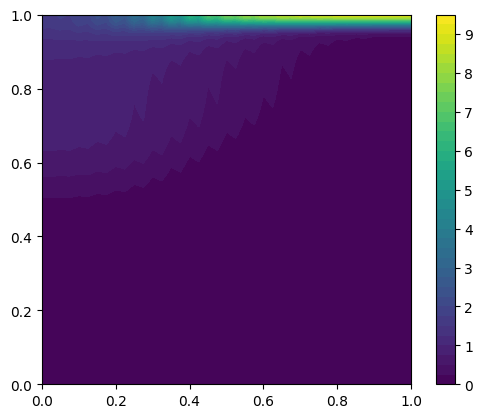

time=54.5: 
iter=1: norm=0.000617611
Solving linear variational problem.
(4141, 4141)
time=55: 
iter=1: norm=0.000620557
Solving linear variational problem.
(4141, 4141)


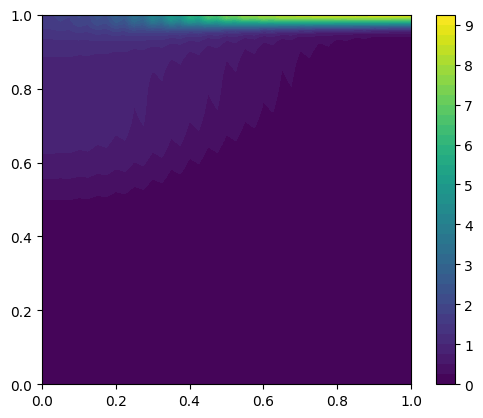

time=55.5: 
iter=1: norm=0.000672836
Solving linear variational problem.
(4141, 4141)
time=56: 
iter=1: norm=0.000766473
Solving linear variational problem.
(4141, 4141)


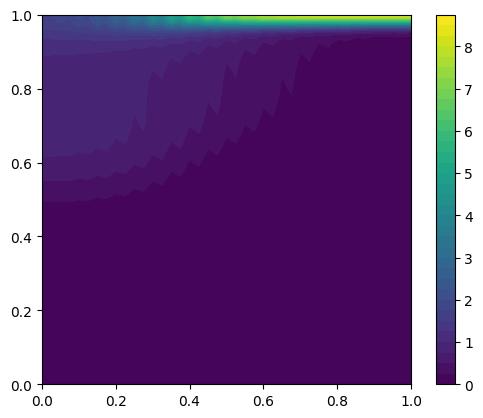

time=56.5: 
iter=1: norm=0.000888752
Solving linear variational problem.
(4141, 4141)
time=57: 
iter=1: norm=0.00102871
iter=2: norm=0.000745938
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


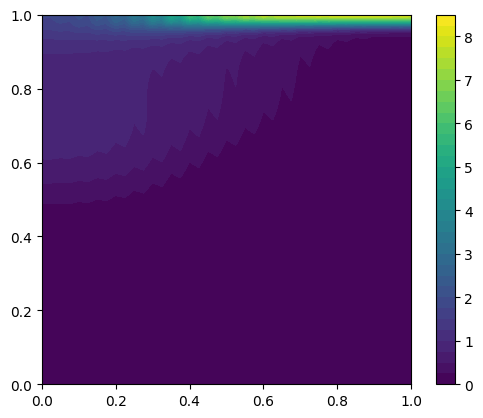

time=57.5: 
iter=1: norm=0.000959795
Solving linear variational problem.
(4141, 4141)
time=58: 
iter=1: norm=0.00116584
iter=2: norm=0.000856675
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


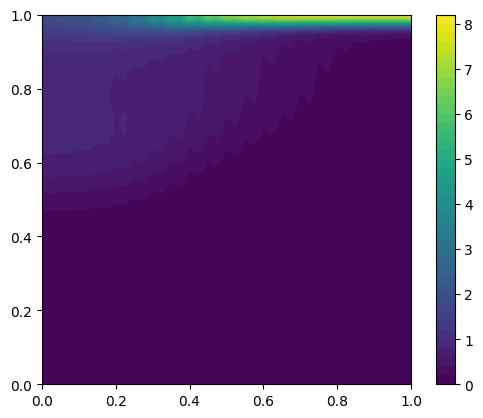

time=58.5: 
iter=1: norm=0.00111019
iter=2: norm=0.000816072
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=59: 
iter=1: norm=0.00111621
iter=2: norm=0.000820046
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


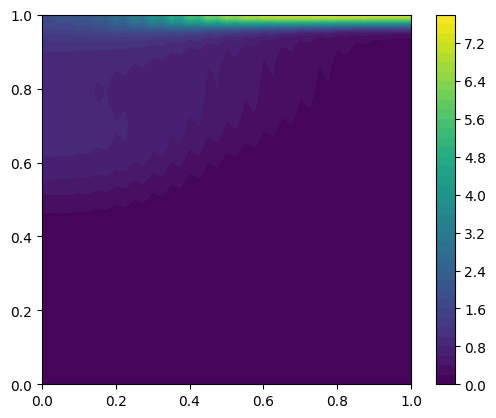

time=59.5: 
iter=1: norm=0.00115665
iter=2: norm=0.000847801
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=60: 
iter=1: norm=0.00121547
iter=2: norm=0.000887587
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


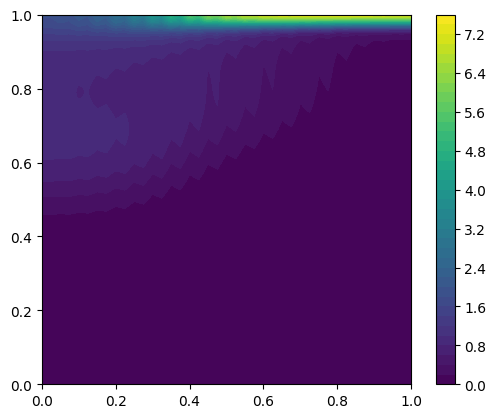

time=60.5: 
iter=1: norm=0.00128363
iter=2: norm=0.000933012
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=61: 
iter=1: norm=0.001356
iter=2: norm=0.000980588
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


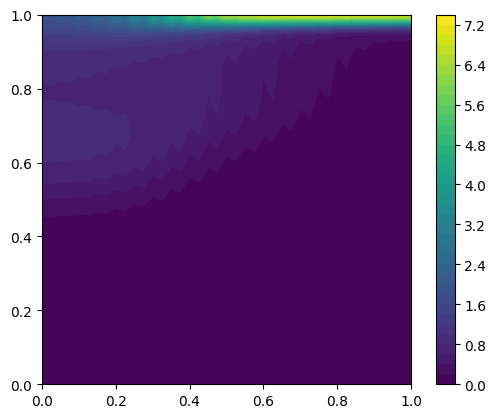

time=61.5: 
iter=1: norm=0.00142965
iter=2: norm=0.0010284
iter=3: norm=0.000745716
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=62: 
iter=1: norm=0.00128682
iter=2: norm=0.000918827
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


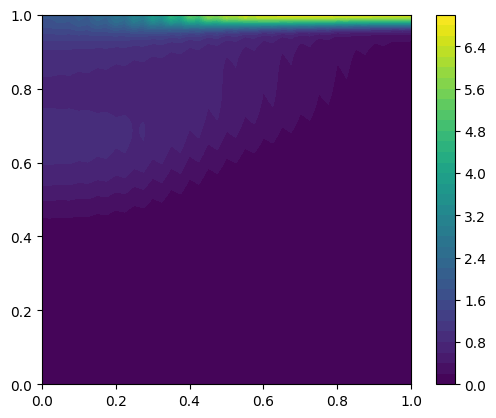

time=62.5: 
iter=1: norm=0.00145506
iter=2: norm=0.00103378
iter=3: norm=0.000751248
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=63: 
iter=1: norm=0.00136439
iter=2: norm=0.000960492
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


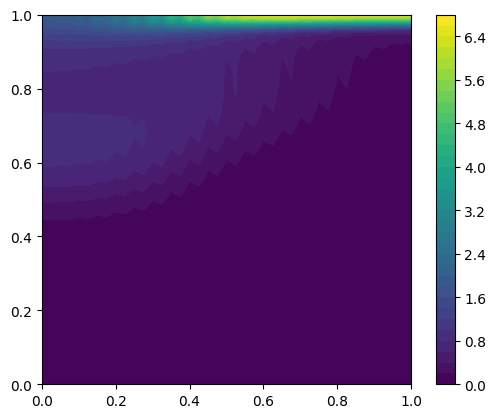

time=63.5: 
iter=1: norm=0.00155735
iter=2: norm=0.00109304
Solving linear variational problem.
Solving linear variational problem.
iter=3: norm=0.000796241
Solving linear variational problem.
(4141, 4141)
time=64: 
iter=1: norm=0.00146924
iter=2: norm=0.00102056
iter=3: norm=0.000744151
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


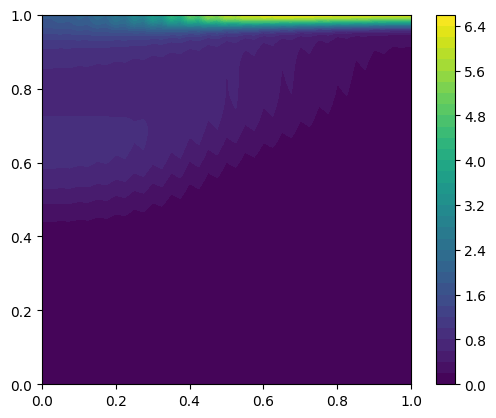

time=64.5: 
iter=1: norm=0.00146298
iter=2: norm=0.00100653
iter=3: norm=0.000734613
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=65: 
iter=1: norm=0.00148884
iter=2: norm=0.00101595
iter=3: norm=0.000742322
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


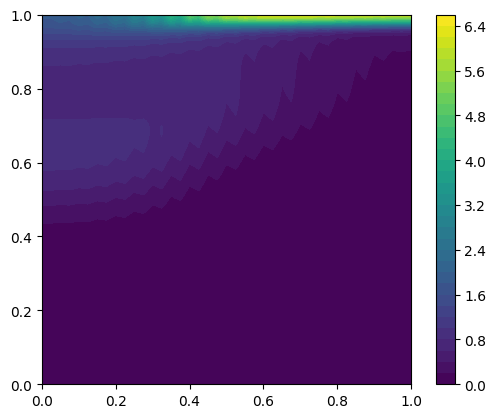

time=65.5: 
iter=1: norm=0.00152705
iter=2: norm=0.00103443
iter=3: norm=0.000756772
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=66: 
iter=1: norm=0.00156938
iter=2: norm=0.00105597
iter=3: norm=0.000773555
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


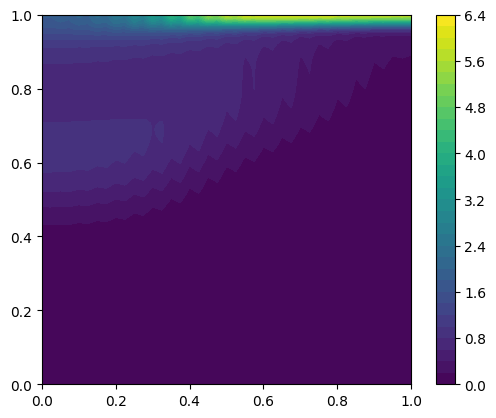

time=66.5: 
iter=1: norm=0.0016124
iter=2: norm=0.00107803
iter=3: norm=0.00079082
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=67: 
iter=1: norm=0.00165465
iter=2: norm=0.00109959
iter=3: norm=0.000807788
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


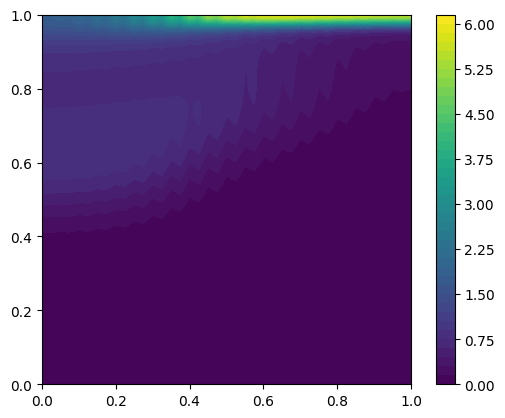

time=67.5: 
iter=1: norm=0.00169552
iter=2: norm=0.00112021
iter=3: norm=0.000824139
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=68: 
iter=1: norm=0.00173479
iter=2: norm=0.00113975
iter=3: norm=0.000839748
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


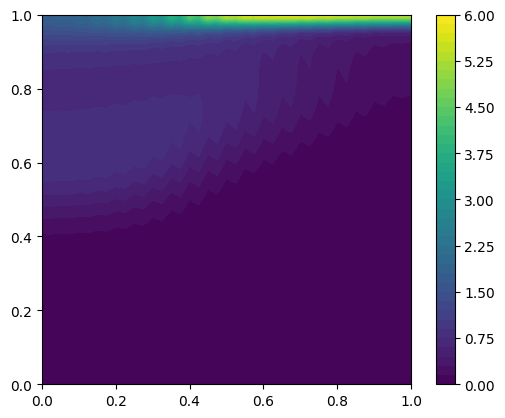

time=68.5: 
iter=1: norm=0.00177235
iter=2: norm=0.00115814
iter=3: norm=0.000854574
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=69: 
iter=1: norm=0.00180818
iter=2: norm=0.00117541
iter=3: norm=0.000868614
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


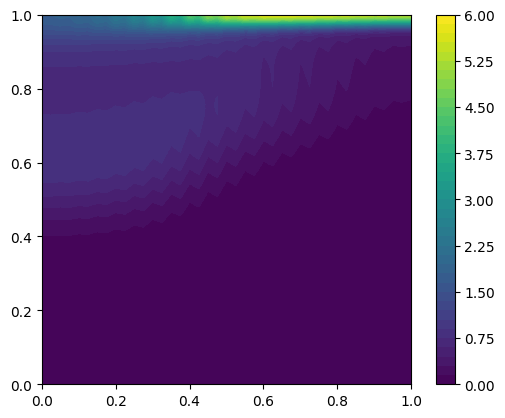

time=69.5: 
iter=1: norm=0.00184229
iter=2: norm=0.00119157
iter=3: norm=0.000881876
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=70: 
iter=1: norm=0.00187469
iter=2: norm=0.00120666
iter=3: norm=0.000894377
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)


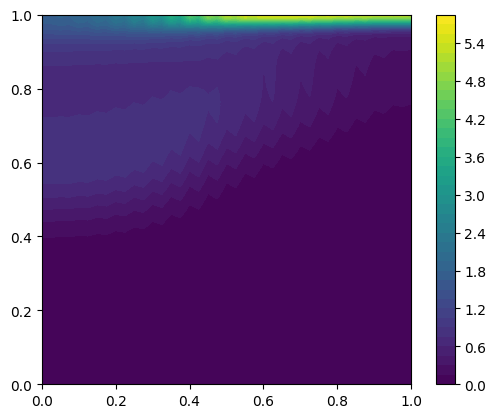

time=70.5: 
iter=1: norm=0.00190542
iter=2: norm=0.0012207
iter=3: norm=0.000906132
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
(4141, 4141)
time=71: 
iter=1: norm=0.00193447
iter=2: norm=0.00123373
iter=3: norm=0.000917157
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.


KeyboardInterrupt: 

In [3]:
m0 = 1e-3
dt = 0.5
T = 100
save_interval = 2
times = []#[0,7/dt,14/dt,21/dt,28/dt]
doses = []#10*np.ones_like(times)
V = FunctionSpace(mesh,"P",2)
n0 = Expression("m0/(pow(2*pi,0.5)*sigma)*exp(-pow(s-s0,2)/(2*sigma*sigma))",m0 = m0,s0 = 0.5,s=0,sigma=sqrt(0.02),degree=2)
# n0 = interpolate(n0,V)
c0 = interpolate(Constant(1.0), V)
path_sol = "solutions/test1D_P2"

solver = s3.Solver3D(mesh, V, n0, c0, dt, T, save_interval, times, doses, path_sol)
# solver.set_parameters({'K_m':0.005})
mass = solver.solve()

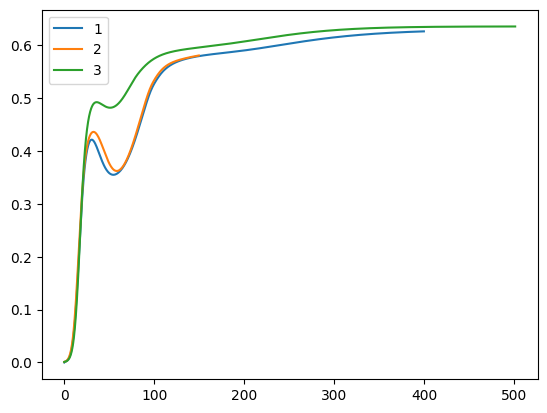

In [7]:
mass = np.load('solutions/test400/mass.npy')
time1 = np.arange(0,400,0.5)
time2 = np.arange(0,150,0.5)
plt.plot(time1,mass)
mass2 = np.load('solutions/test1D_newmatrix/mass.npy')
plt.plot(time2,mass2)
mass3 = np.load('../Model1D/solutions/B_Km0.005/mass.npy')
time3 = np.arange(0,501,0.1)
plt.plot(time3,mass3)
# mass4 = np.load('solutions/t400_masses/mass.npy')
# plt.plot(time2,mass4)
plt.legend(['1','2','3'])

In [ ]:
csc = np.load('solutions/test1D_modifiche/csc_mass.npy')
dc = np.load('solutions/test1D_modifiche/dc_mass.npy')
tdc = np.load('solutions/test1D_modifiche/tdc_mass.npy')
#plt.plot(time01,csc)
#plt.plot(time01,csc+dc)
print(csc[-1],dc[-1],tdc[-1])
print(mass2)

time=np.arange(0,400,0.5)
plt.fill_between(time, csc, color='skyblue', alpha=0.4)
plt.fill_between(time, csc+dc, csc, where=(csc+dc > csc), color='orange', alpha=0.4)
plt.fill_between(time, 1, csc+dc, where=(1 > csc+dc), color='green', alpha=0.4)
plt.ylim([0,1])
#plt.xlim([0,150])
plt.ylabel('(%) cells')
plt.xlabel('time [days]')
plt.legend(['CSC','DC','TDC'])

## 2D

In [1]:
from dolfin import *
import matplotlib.pyplot as plt
import numpy as np
import matrix2D as m2

Missing HsMG for fract norm computing


/home/saragazzoni/miniconda3/envs/myfenics/lib/python3.11/site-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()


In [2]:
mesh2D = UnitSquareMesh(20,20)

In [3]:
m0 = 1e-3
dt = 0.5
T = 100
save_interval = 10
times = []#[0,7/dt,14/dt,21/dt,28/dt]
doses = []#10*np.ones_like(times)
V2D = FunctionSpace(mesh2D,"P",1)
n0 = Expression("m0/(pow(2*pi,0.5)*sigma)*exp(-pow(s-s0,2)/(2*sigma*sigma))",m0 = m0,s0 = 0.5,s=0,sigma=sqrt(0.02),degree=2)
# n0 = interpolate(n0,V)
c0 = interpolate(Constant(1.0), V2D)
path_sol = "solutions/test2D_newmatrix"

solver = m2.MatrixSolver(mesh2D, V2D, n0, c0, dt, T, save_interval, times, doses, path_sol)
# solver.set_parameters({'K_m':0.005})
solver.solve()

time=0: 
Solving linear variational problem.
iter=1: norm=7.90254e-06
LGMRES converged [iter= 1, time=1.63s, res=8.8e-10]
time=0.5: 
iter=1: norm=0.00173624
iter=2: norm=3.35484e-06
Solving linear variational problem.
Solving linear variational problem.
LGMRES converged [iter= 1, time=1.62s, res=1.3e-09]
time=1: 
iter=1: norm=0.000371191
Solving linear variational problem.
LGMRES converged [iter= 1, time=1.83s, res=1.9e-09]
time=1.5: 
iter=1: norm=0.000464782
Solving linear variational problem.
LGMRES converged [iter= 1, time=1.79s, res=2.3e-09]
time=2: 
iter=1: norm=0.000579677
Solving linear variational problem.
LGMRES converged [iter= 1, time=1.81s, res=2.8e-09]
time=2.5: 
iter=1: norm=0.000720808
Solving linear variational problem.
LGMRES converged [iter= 1, time=1.79s, res=3.4e-09]
time=3: 
Solving linear variational problem.
iter=1: norm=0.000893146
LGMRES converged [iter= 1, time=1.74s, res=3.8e-09]
time=3.5: 
Solving linear variational problem.
iter=1: norm=0.00110226
iter=2: n

NameError: name 'xnew' is not defined

In [4]:
print(len(n_vect))


88641


Text(0, 0.5, 'mass')

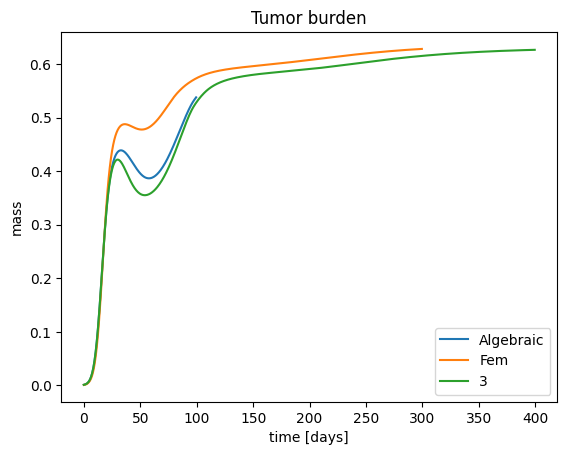

In [7]:
mass = np.load('solutions/test2D_newmatrix/mass.npy')
time = np.arange(0,100,0.5)
plt.plot(time,mass)
mass2 = np.load('../Model2D/solutions/m01e-3_T300_mesh10/mass.npy')
time2 = np.arange(0,300,0.5)
plt.plot(time2,mass2)
mass3 = np.load('solutions/test2D_masses/mass.npy')
time3 = np.arange(0,400,0.5)
plt.plot(time3,mass3)
# plt.xlim([0,600])
plt.legend(['Algebraic','Fem','3'])
plt.title('Tumor burden')
plt.xlabel('time [days]')
plt.ylabel('mass')

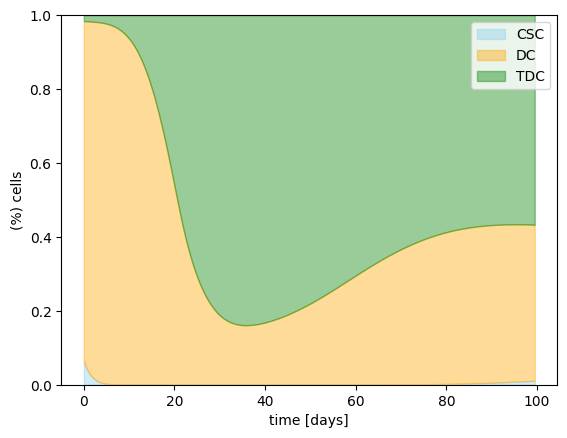

In [10]:
csc = np.load('solutions/test2D_newmatrix/csc_mass.npy')
dc = np.load('solutions/test2D_newmatrix/dc_mass.npy')
tdc = np.load('solutions/test2D_newmatrix/tdc_mass.npy')
#plt.plot(time01,csc)
#plt.plot(time01,csc+dc)
# print(csc[600],dc[600],tdc[600])
# print(mass[-1])

time=np.arange(0,100,0.5)
plt.fill_between(time, csc, color='skyblue', alpha=0.4)
plt.fill_between(time, csc+dc, csc, where=(csc+dc > csc), color='orange', alpha=0.4)
plt.fill_between(time, 1, csc+dc, where=(1 > csc+dc), color='green', alpha=0.4)
plt.ylim([0,1])
# plt.xlim([0,300])
plt.ylabel('(%) cells')
plt.xlabel('time [days]')
plt.legend(['CSC','DC','TDC'])


5.0000000000000036


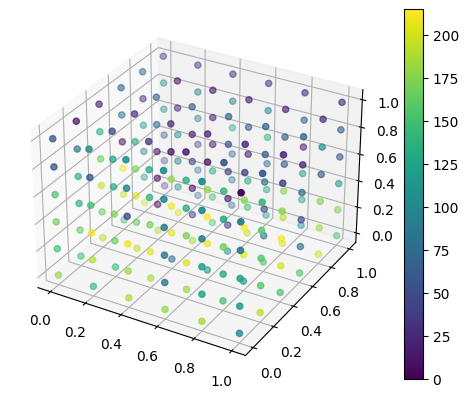

In [7]:
Ns = int(1/0.005)
# vec = []
# for i in range(Ns-1):
#     vec.extend(x[i])
mesh3D = UnitCubeMesh(5,5,5)
V3D = FunctionSpace(mesh3D,"P",1)
# print(mesh3D.coordinates())
x = np.arange(0,mesh3D.coordinates().shape[0])
# print(x)
xnew = [x[i] for i in dof_to_vertex_map(V3D)]
f3D = Function(V3D)
f3D.vector()[:] = xnew
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
sol = ax.scatter(mesh3D.coordinates()[:,0],mesh3D.coordinates()[:,1],mesh3D.coordinates()[:,2],c=f3D.vector()[:])
print(f3D(1,0,0))
plt.colorbar(sol)
# print(vec[:])
# print(max(n_vect))


In [8]:
mesh2D = UnitSquareMesh(5,5)
V2D = FunctionSpace(mesh2D,"P",1)
f2D = Function(V2D)
print(len(vec))
f2D.vector()[:] = vec[-36:]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(mesh2D.coordinates()[:,0],mesh2D.coordinates()[:,1],np.ones(mesh2D.coordinates().shape[0]),c=f2D.compute_vertex_values())
ax.scatter(mesh2D.coordinates()[:,0],mesh2D.coordinates()[:,1],np.zeros(mesh2D.coordinates().shape[0]),c=f2D.compute_vertex_values())
# plot(f2D)
plt.show()
plt.colorbar(plot(f2D))

NameError: name 'vec' is not defined

15.9984
0.9899999999999995
22.980000000000004
11.999999999999998
15.0
[48 32 53 49 52 16 37 33 54 50 36 57 56 58  0 21 17 38 34 55 51 20 41 40
 61 60 42 59 63 62  1  5  4 25 24 45 44 22 18 39 35 26 43 47 46  2  6 23
 19  9  8 29 28 10 27 31 30  3  7 11 15 14 13 12]


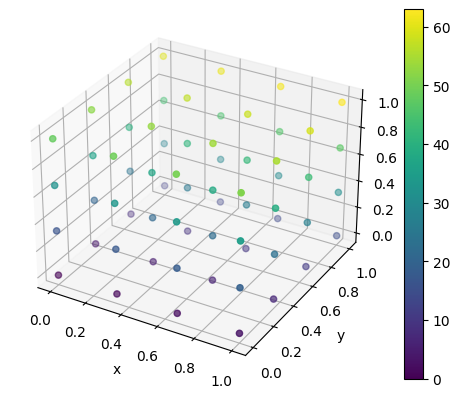

In [ ]:
# Ns = int(1/0.005)
mesh3D = UnitCubeMesh(3,3,3)
V3D = FunctionSpace(mesh3D,"P",1)
# print(mesh3D.coordinates())
x_vec = np.arange(0,mesh3D.coordinates().shape[0])
# print(x)
vec = [x_vec[i] for i in dof_to_vertex_map(V3D)]
f3D = Function(V3D)
f3D.vector()[:] = vec
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ciao = ax.scatter(mesh3D.coordinates()[:,0],mesh3D.coordinates()[:,1],mesh3D.coordinates()[:,2],c=f3D.compute_vertex_values())
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.colorbar(ciao)
print(f3D(0,0,0.3333))
print(f3D(0.33,0,0))
print(f3D(1,0.333,0.333))
print(f3D(0,1,0))
print(f3D(1,1,0))
print(dof_to_vertex_map(V3D))
